In [886]:
import numpy as np
#changing parameters
a = 7.57e-15 # erg cm^-3 K^-4
B_12 = 47/11.6  # magnetic field strength (10^12 G units)
L_37 = 2.5  # luminosity (10^37 erg/s units)
alpha = 0.1  # alpha parameter for the thin disk
w = 1
k = 1.5e-4  # assuming k is 1 for this estimation
dot_M = L_37 * 1e37 * R_0 / (G * M_0)
print(f"dot_M: {dot_M:.3e} cm")
# Given constants in CGS units
mu_e = 1.18
m_p = 1.67e-24  # g
G = 6.674e-8  # cm^3 g^-1 s^-2
sigma_T = 6.65e-25  # cm^2
c = 3e10  # cm/s

# Assumed parameters for the specific neutron star
Lambda = 0.5  # geometric factor
m = 1.4  # neutron star mass (solar masses)
R_6 = 1  # neutron star radius (10^6 cm units)
# Neutron star properties
R_0 = R_6 * 1e6  # cm (example neutron star radius)
M_0 = m * 1.989e33  # g (1.4 times the mass of the sun)
#k = 0.106 * (Lambda / 0.1)**(1/2) * w**2 * (m / 1.4)**(-5/28) * (R_6 / 10)**(-15/28) * B_12**(-12/7) * L_37**(5/14)
print(f"k: {k:.3e} cm")



# Calculate R_m
R_m = 2.6e8 * Lambda**(1/7) * m**(1/7) * R_6**(10/7) * B_12**(4/7) * L_37**(-2/7)  # cm
print(f"R_m: {R_m:.3e} cm")


H_m_over_R_m = 0.1 * alpha**(-1/10) * Lambda**(1/8) * m**(-71/140) * R_6**(23/70) * B_12**(1/14) * L_37**(4/35)
print(f"H_m_over_R_m: {H_m_over_R_m:.3e} ")

# for disk accretion 
d = np.sqrt(R_0**3 / R_m) * H_m_over_R_m
print(f"d: {d:.3e} cm")
S_D = 3e9 * Lambda**(-7/8) * m**(-13/20) * R_6**(19/10) * B_12**(-1/2) * L_37**(2/5)
print(f"S_D: {S_D:.3e} cm^2")

# for wind accretion
r_0 = np.sqrt(R_0**3 / R_m)
print(f"r_0: {r_0:.3e} cm")
S_W = 1.3e10 * Lambda**(-1) * m**(-1/7) * R_6**(11/7) * B_12**(-4/7) * L_37**(2/7)
print(f"S_W: {S_W:.3e} cm^2")


# Calculate free-fall velocity using the given formula
v_ff = np.sqrt(2 * G * M_0 / R_0)
print(f"v_ff: {v_ff:.3e} cm/s")
# Effective cross-section
sigma_eff = k * sigma_T

# Effective opacity
kappa_eff = sigma_eff / (mu_e * m_p)

# Calculating the natural frequency omega
omega_D = np.sqrt((kappa_eff * v_ff * G * M_0) / (R_0 * S_D * c * d**2))

omega_W = np.sqrt((kappa_eff * v_ff * G * M_0) / (R_0 * S_W * c * r_0**2))
# Converting omega to frequency in Hz
frequency_D = 1000*omega_D / (2 * np.pi)
frequency_W = 1000*omega_W / (2 * np.pi)
# Output the frequency
print(f"frequency_D: {frequency_D:.3f} mHz.")
print(f"frequency_W: {frequency_W:.3f} mHz.")

dot_M: 1.345e+17 cm
k: 1.500e-04 cm
R_m: 4.230e+08 cm
H_m_over_R_m: 1.194e-01 
d: 5.807e+03 cm
S_D: 3.169e+09 cm^2
r_0: 4.862e+04 cm
S_W: 1.447e+10 cm^2
v_ff: 1.928e+10 cm/s
frequency_D: 37.855 mHz.
frequency_W: 2.116 mHz.


In [887]:
# Define the variables for the calculation
B = 47/11.6 * 1e12  # Magnetic field in Gauss
A_perp_R_star = np.pi * r_0**2  # Area in cm^2
R_star = 10 * 1e5  # Radius in cm
dot_M = 1.35 * 10**17  # Mass accretion rate in g/s

# Given constant factor
constant_factor = 340

# Calculate t_r using the given formula
t_r = constant_factor * (B / 1e12)**2 * (A_perp_R_star / 1e12) * (R_star / 1e6)**2 * (6.307 * 10**17 / dot_M)

print(f"Estimated t_r: {t_r} s")

Estimated t_r: 193.6544389422609 s


In [895]:
k = 0.02
0.25 * (1/k)**(1/2) * r_0

85948.82506325406

In [796]:
T_eff_D = 6.6 * Lambda**(7/32) * m**(13/80) * R_6**(-19/40) * B_12**(1/8) * L_37**(3/20)

# Output the effective temperature
print(f"The estimated effective temperature T_eff^D is approximately {T_eff_D:.2f} keV.")
kappa_T = 0.34
print(kappa_T*k,kappa_eff)
#L_crit = (c / kappa_eff) * (np.pi * d) * (G * M_0 / R_0)
L_crit = 3.7e36 * (kappa_T/kappa_eff) * (d / 1e5 / R_6) * m
#L_crit = S_D * (c / kappa_eff) * (v_ff**2 / d)
L_crit

The estimated effective temperature T_eff^D is approximately 8.19 keV.
5.1e-05 5.061910078148786e-05


2.0204790474840272e+39

In [799]:
# Given values
B = B_12 * 1e12  # Magnetic field in Gauss
print(f"B: {B:.3e} G.")
# Normalization values
B_norm = 10**12  # G
A_perp_norm = 10**12  # cm^2
R_star_norm = 10 * 10**5  # cm
M_dot_norm = 10**-8 * 1.989e33 / 3.15576e7  # g/s
print(f"dot_M: {dot_M:.3e} g/s")
# Calculate t_r
#t_r = 340 * (B / B_norm)**2 * (S_D / A_perp_norm) * (R_0 / R_star_norm)**2 * (M_dot_norm / dot_M)
t_r = 1/0.035
A_perp = t_r / 340 * (B_norm / B)**2 * (R_star / R_star_norm)**2 * (dot_M / M_dot_norm) * 10**12  # cm^2
# Output the result
#print(f"The calculated value of t_r is approximately {t_r:.2f} seconds.")
print(f"The calculated value of A_perp is approximately {A_perp:.2e} cm^2.")

B: 4.052e+12 G.
dot_M: 1.345e+17 g/s
The calculated value of A_perp is approximately 1.09e+09 cm^2.


In [800]:
import numpy as np
#changing parameters
k = 4e-3  # assuming k is 1 for this estimation
B_12 = 43/11.6  # magnetic field strength (10^12 G units)
L_37 = 12  # luminosity (10^37 erg/s units)
alpha = 0.1  # alpha parameter for the thin disk
w = 1
dot_M = L_37 * 1e37 * R_0 / (G * M_0)


# Given constants in CGS units
mu_e = 1.18
m_p = 1.67e-24  # g
G = 6.674e-8  # cm^3 g^-1 s^-2
sigma_T = 6.65e-25  # cm^2
c = 3e10  # cm/s

# Assumed parameters for the specific neutron star
Lambda = 0.5  # geometric factor
m = 1.4  # neutron star mass (solar masses)
R_6 = 1  # neutron star radius (10^6 cm units)
# Neutron star properties
R_0 = R_6 * 1e6  # cm (example neutron star radius)
M_0 = m * 1.989e33  # g (1.4 times the mass of the sun)
#k = 0.106 * (Lambda / 0.1)**(1/2) * w**2 * (m / 1.4)**(-5/28) * (R_6 / 10)**(-15/28) * B_12**(-12/7) * L_37**(5/14)
print(f"k: {k:.3e} cm")



# Calculate R_m
R_m = 2.6e8 * Lambda**(1/7) * m**(1/7) * R_6**(10/7) * B_12**(4/7) * L_37**(-2/7)  # cm
print(f"R_m: {R_m:.3e} cm")


H_m_over_R_m = 0.1 * alpha**(-1/10) * Lambda**(1/8) * m**(-71/140) * R_6**(23/70) * B_12**(1/14) * L_37**(4/35)
print(f"H_m_over_R_m: {H_m_over_R_m:.3e} ")

# for disk accretion 
d = np.sqrt(R_0**3 / R_m) * H_m_over_R_m
print(f"d: {d:.3e} cm")
S_D = 3e9 * Lambda**(-7/8) * m**(-13/20) * R_6**(19/10) * B_12**(-1/2) * L_37**(2/5)
print(f"S_D: {S_D:.3e} cm^2")

# for wind accretion
r_0 = np.sqrt(R_0**3 / R_m)
print(f"r_0: {r_0:.3e} cm")
S_W = 1.3e10 * Lambda**(-1) * m**(-1/7) * R_6**(11/7) * B_12**(-4/7) * L_37**(2/7)
print(f"S_W: {S_W:.3e} cm^2")


# Calculate free-fall velocity using the given formula
v_ff = np.sqrt(2 * G * M_0 / R_0)
print(f"v_ff: {v_ff:.3e} cm/s")
# Effective cross-section
sigma_eff = k * sigma_T

# Effective opacity
kappa_eff = sigma_eff / (mu_e * m_p)

# Calculating the natural frequency omega
omega_D = np.sqrt((kappa_eff * v_ff * G * M_0) / (R_0 * S_D * c * d**2))

omega_W = np.sqrt((kappa_eff * v_ff * G * M_0) / (R_0 * S_W * c * r_0**2))
# Converting omega to frequency in Hz
frequency_D = 1000*omega_D / (2 * np.pi)
frequency_W = 1000*omega_W / (2 * np.pi)
# Output the frequency
print(f"frequency_D: {frequency_D:.3f} mHz.")
print(f"frequency_W: {frequency_W:.3f} mHz.")

k: 4.000e-03 cm
R_m: 2.568e+08 cm
H_m_over_R_m: 1.420e-01 
d: 8.860e+03 cm
S_D: 6.204e+09 cm^2
r_0: 6.240e+04 cm
S_W: 2.384e+10 cm^2
v_ff: 1.928e+10 cm/s
frequency_D: 91.570 mHz.
frequency_W: 6.633 mHz.


In [801]:
T_eff_D = 6.6 * Lambda**(7/32) * m**(13/80) * R_6**(-19/40) * B_12**(1/8) * L_37**(3/20)

# Output the effective temperature
print(f"The estimated effective temperature T_eff^D is approximately {T_eff_D:.2f} keV.")
kappa_T = 0.34
print(kappa_T*k,kappa_eff)
#L_crit = (c / kappa_eff) * (np.pi * d) * (G * M_0 / R_0)
L_crit = 3.7e36 * (kappa_T/kappa_eff) * (d / 1e5 / R_6) * m
#L_crit = S_D * (c / kappa_eff) * (v_ff**2 / d)
L_crit

The estimated effective temperature T_eff^D is approximately 10.24 keV.
0.00136 0.0013498426875063433


1.155951641742096e+38

In [803]:
# Given values
B = B_12 * 1e12  # Magnetic field in Gauss
print(f"B: {B:.3e} G.")
# Normalization values
B_norm = 10**12  # G
A_perp_norm = 10**12  # cm^2
R_star_norm = 10 * 10**5  # cm
M_dot_norm = 10**-8 * 1.989e33 / 3.15576e7  # g/s
print(f"dot_M: {dot_M:.3e} g/s")
# Calculate t_r
#t_r = 340 * (B / B_norm)**2 * (S_D / A_perp_norm) * (R_0 / R_star_norm)**2 * (M_dot_norm / dot_M)
t_r = 1/0.087
A_perp = t_r / 340 * (B_norm / B)**2 * (R_star / R_star_norm)**2 * (dot_M / M_dot_norm) * 10**12  # cm^2
# Output the result
#print(f"The calculated value of t_r is approximately {t_r:.2f} seconds.")
print(f"The calculated value of A_perp is approximately {A_perp:.2e} cm^2.")

B: 3.707e+12 G.
dot_M: 6.457e+17 g/s
The calculated value of A_perp is approximately 2.52e+09 cm^2.


In [805]:
print(B_12)
t_ocean = 100 * (B_12)**(3/2.)
t_ocean

3.706896551724138


713.7000045555006

In [845]:
import numpy as np

# Given value for epsilon_c
epsilon_c = 0.53

# Calculate tau_star
tau_star = (2 / 7) * np.arctanh(2 / 7 * epsilon_c)

# Calculate sech^2(x)
def sech2(x):
    return (2 / (np.exp(x) + np.exp(-x)))**2

# Calculate mu'(0)
mu_prime_0 = (7 / (2 * epsilon_c + 7)) * (-7 / 2) * sech2((7 / 2) * tau_star)

# Output the results
print(f"tau_star = {tau_star:.4f}")
print(f"mu'(0) = {mu_prime_0:.4f}")

tau_star = 0.0436
mu'(0) = -2.9700


0.53 0.5833333333333334


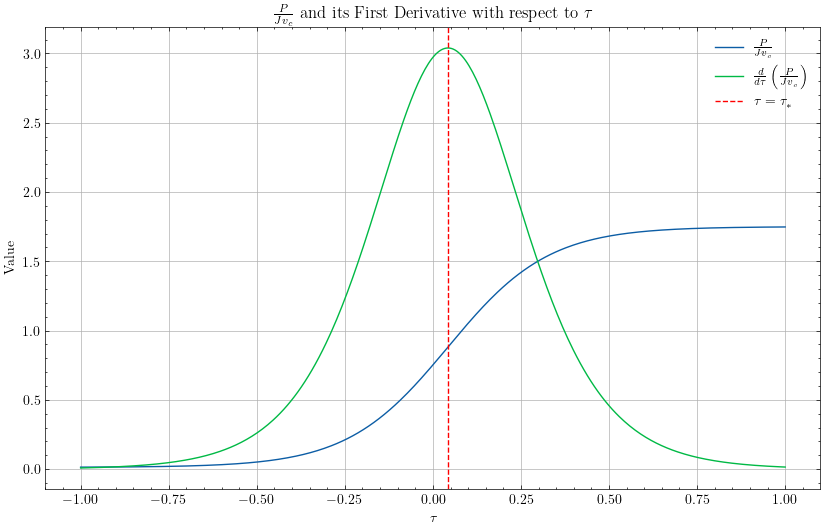

0.0429390828101489

In [851]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, tanh, diff, atan

# Define the symbols
tau, epsilon_c = symbols('tau epsilon_c')

# Define the given function for μ(τ)
mu = (7 / (2 * epsilon_c + 7)) * (1 - tanh((7 / 2) * (tau - (2 / 7) * atan(2 / 7 * epsilon_c))))

# Define the given function for P / (J v_c)
P_Jvc = 7 / 4 - mu

# Calculate the first derivative of P / (J v_c) with respect to tau
first_derivative = diff(P_Jvc, tau)

# Set a value for epsilon_c for the plot
#epsilon_c_value = 0.5
Mach_obs1,Mach_obs2 = 10, 6
epsilon_c_value1 = 1/2 + 3/Mach_obs1**2
epsilon_c_value2 = 1/2 + 3/Mach_obs2**2
print(epsilon_c_value1, epsilon_c_value2)
epsilon_c_value = epsilon_c_value1
# Generate values for tau from -1 to 1
tau_values = np.linspace(-1, 1, 400)

# Substitute epsilon_c value and tau values into the P / (J v_c) and its derivative
P_Jvc_values = [P_Jvc.subs({tau: t, epsilon_c: epsilon_c_value}).evalf() for t in tau_values]
derivative_values = [first_derivative.subs({tau: t, epsilon_c: epsilon_c_value}).evalf() for t in tau_values]

# Calculate the value of tau_star
tau_star = (2 / 7) * atan(2 / 7 * epsilon_c_value)

# Plot P / (J v_c) and its first derivative
plt.figure(figsize=(10, 6))

# Plot P / (J v_c)
plt.plot(tau_values, P_Jvc_values, label=r"$\frac{P}{Jv_c}$")

# Plot the first derivative of P / (J v_c)
plt.plot(tau_values, derivative_values, label=r"$\frac{d}{d\tau} \left( \frac{P}{Jv_c} \right)$")

# Add a vertical dashed line at tau = tau_star
plt.axvline(x=tau_star, color='r', linestyle='--', label=r"$\tau = \tau_*$")

plt.xlabel(r'$\tau$')
plt.ylabel(r'Value')
plt.title(r'$\frac{P}{Jv_c}$ and its First Derivative with respect to $\tau$')
plt.legend()
plt.grid(True)
plt.show()

tau_star

0.53 0.5833333333333334


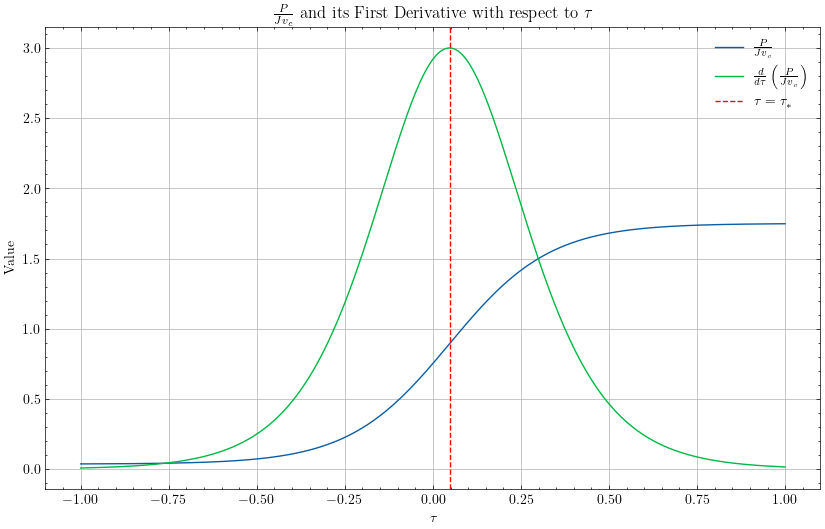

0.0471853364041791

In [852]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, tanh, diff, atan

# Define the symbols
tau, epsilon_c = symbols('tau epsilon_c')

# Define the given function for μ(τ)
mu = (7 / (2 * epsilon_c + 7)) * (1 - tanh((7 / 2) * (tau - (2 / 7) * atan(2 / 7 * epsilon_c))))

# Define the given function for P / (J v_c)
P_Jvc = 7 / 4 - mu

# Calculate the first derivative of P / (J v_c) with respect to tau
first_derivative = diff(P_Jvc, tau)

# Set a value for epsilon_c for the plot
#epsilon_c_value = 0.5
Mach_obs1,Mach_obs2 = 10, 6
epsilon_c_value1 = 1/2 + 3/Mach_obs1**2
epsilon_c_value2 = 1/2 + 3/Mach_obs2**2
print(epsilon_c_value1, epsilon_c_value2)
epsilon_c_value = epsilon_c_value2

# Generate values for tau from -1 to 1
tau_values = np.linspace(-1, 1, 400)

# Substitute epsilon_c value and tau values into the P / (J v_c) and its derivative
P_Jvc_values = [P_Jvc.subs({tau: t, epsilon_c: epsilon_c_value}).evalf() for t in tau_values]
derivative_values = [first_derivative.subs({tau: t, epsilon_c: epsilon_c_value}).evalf() for t in tau_values]

# Calculate the value of tau_star
tau_star = (2 / 7) * atan(2 / 7 * epsilon_c_value)

# Plot P / (J v_c) and its first derivative
plt.figure(figsize=(10, 6))

# Plot P / (J v_c)
plt.plot(tau_values, P_Jvc_values, label=r"$\frac{P}{Jv_c}$")

# Plot the first derivative of P / (J v_c)
plt.plot(tau_values, derivative_values, label=r"$\frac{d}{d\tau} \left( \frac{P}{Jv_c} \right)$")

# Add a vertical dashed line at tau = tau_star
plt.axvline(x=tau_star, color='r', linestyle='--', label=r"$\tau = \tau_*$")

plt.xlabel(r'$\tau$')
plt.ylabel(r'Value')
plt.title(r'$\frac{P}{Jv_c}$ and its First Derivative with respect to $\tau$')
plt.legend()
plt.grid(True)
plt.show()

tau_star

In [879]:
# Define the variables for the calculation
B = 47/11.6 * 10**12  # Magnetic field in Gauss
A_perp_R_star = 0.1 * 1e6 * 1e6  # Area in cm^2
R_star = 10**6  # Radius in cm
dot_M = 1.35 * 10**17  # Mass accretion rate in g/s

# Given constant factor
constant_factor = 340

# Calculate t_r using the given formula
t_r = constant_factor * (B / 10**12)**2 * (A_perp_R_star / 10**12) * (R_star / 10**6)**2 * (6.307 * 10**17 / dot_M)

print(f"Estimated t_r: {t_r} s")

Estimated t_r: 2607.6404963227196 s
